## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#To display Matplotlib plots directly in the output cells of the notebook without the nreed to call plt.show()
%matplotlib inline
# pd.options.display.float_format = '{:.5f}'.format

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

In [3]:
train = pd.read_csv('Train Dataset.csv')

test = pd.read_csv('Test Dataset.csv')

sub = pd.read_csv('Sample Submission.csv')

In [4]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
train.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
train.shape, test.shape

((7303, 15), (2697, 14))

In [6]:
train.dtypes

Id            int64
Age           int64
Sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Exploratory Data Analysis

In [8]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Age

In [13]:
train['Age'].describe()

count    7303.000000
mean       53.172669
std        14.185970
min        29.000000
25%        41.000000
50%        53.000000
75%        65.000000
max        77.000000
Name: Age, dtype: float64

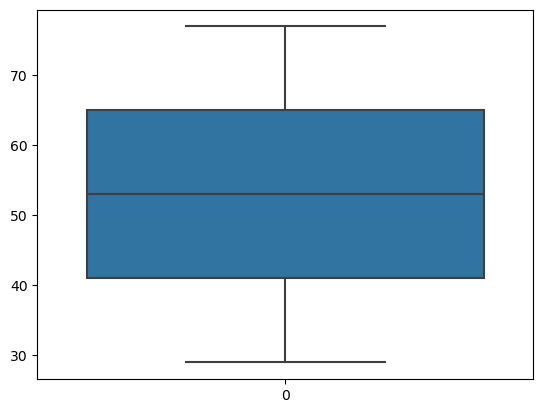

In [11]:
sns.boxplot(train['Age'])
plt.show()

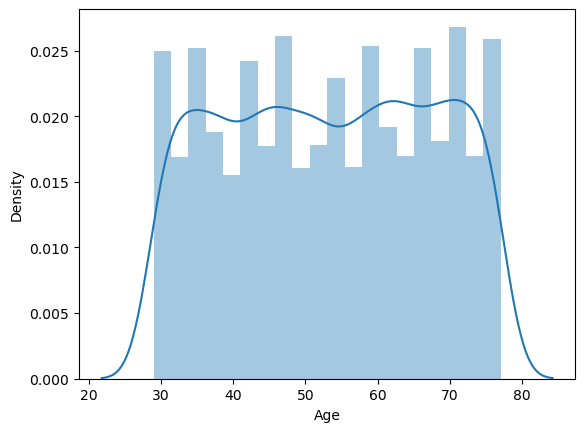

In [12]:
sns.distplot(train['Age'])
plt.show()

### Sex

In [15]:
train['Sex'].value_counts()

Sex
0    3654
1    3649
Name: count, dtype: int64

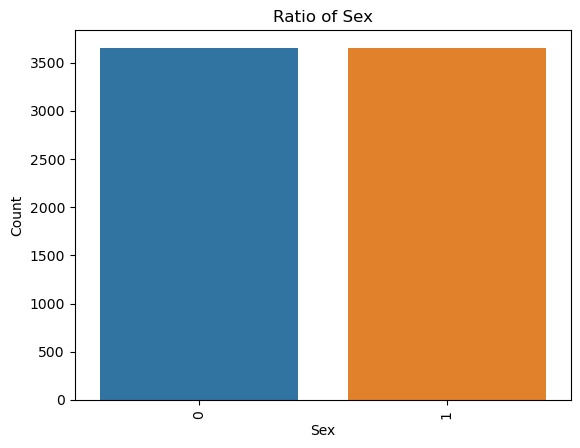

In [19]:
#Countplot of Sex

sns.countplot(x = 'Sex', data = train)
plt.title('Ratio of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### cp = chest pain type (4 values)

In [22]:
train['cp'].value_counts()

cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64

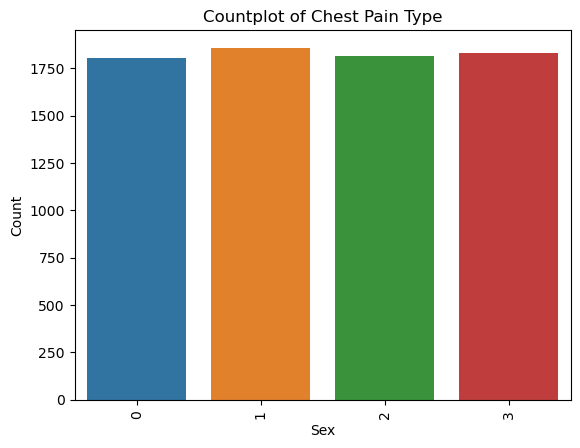

In [23]:
#Countplot of 

sns.countplot(x = 'cp', data = train)
plt.title('Countplot of Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### resting blood pressure

In [24]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
train['trestbps'].describe()

count    7303.000000
mean      147.447487
std        31.099538
min        94.000000
25%       120.000000
50%       148.000000
75%       174.000000
max       200.000000
Name: trestbps, dtype: float64

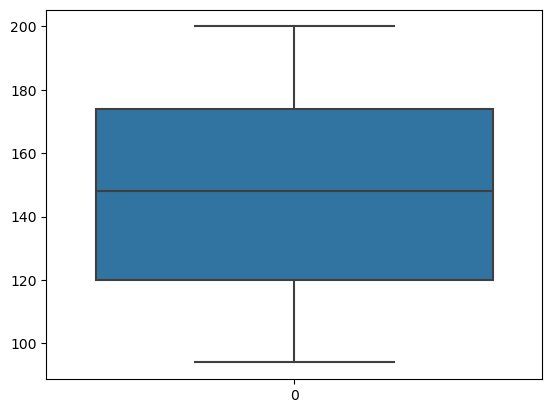

In [28]:
sns.boxplot(train['trestbps'])

plt.show()

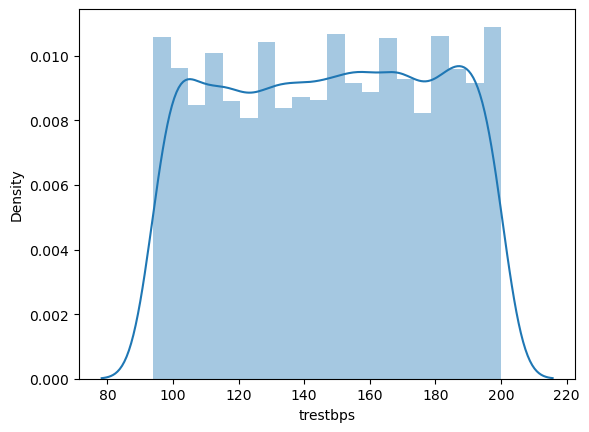

In [31]:
sns.distplot(train['trestbps'])
plt.show()

### serum cholestoral in mg/dl

In [33]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
train['chol'].describe()

count    7303.000000
mean      342.805970
std       127.291998
min       126.000000
25%       231.000000
50%       341.000000
75%       450.000000
max       564.000000
Name: chol, dtype: float64

## Quick modelling

In [38]:
train.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
test.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

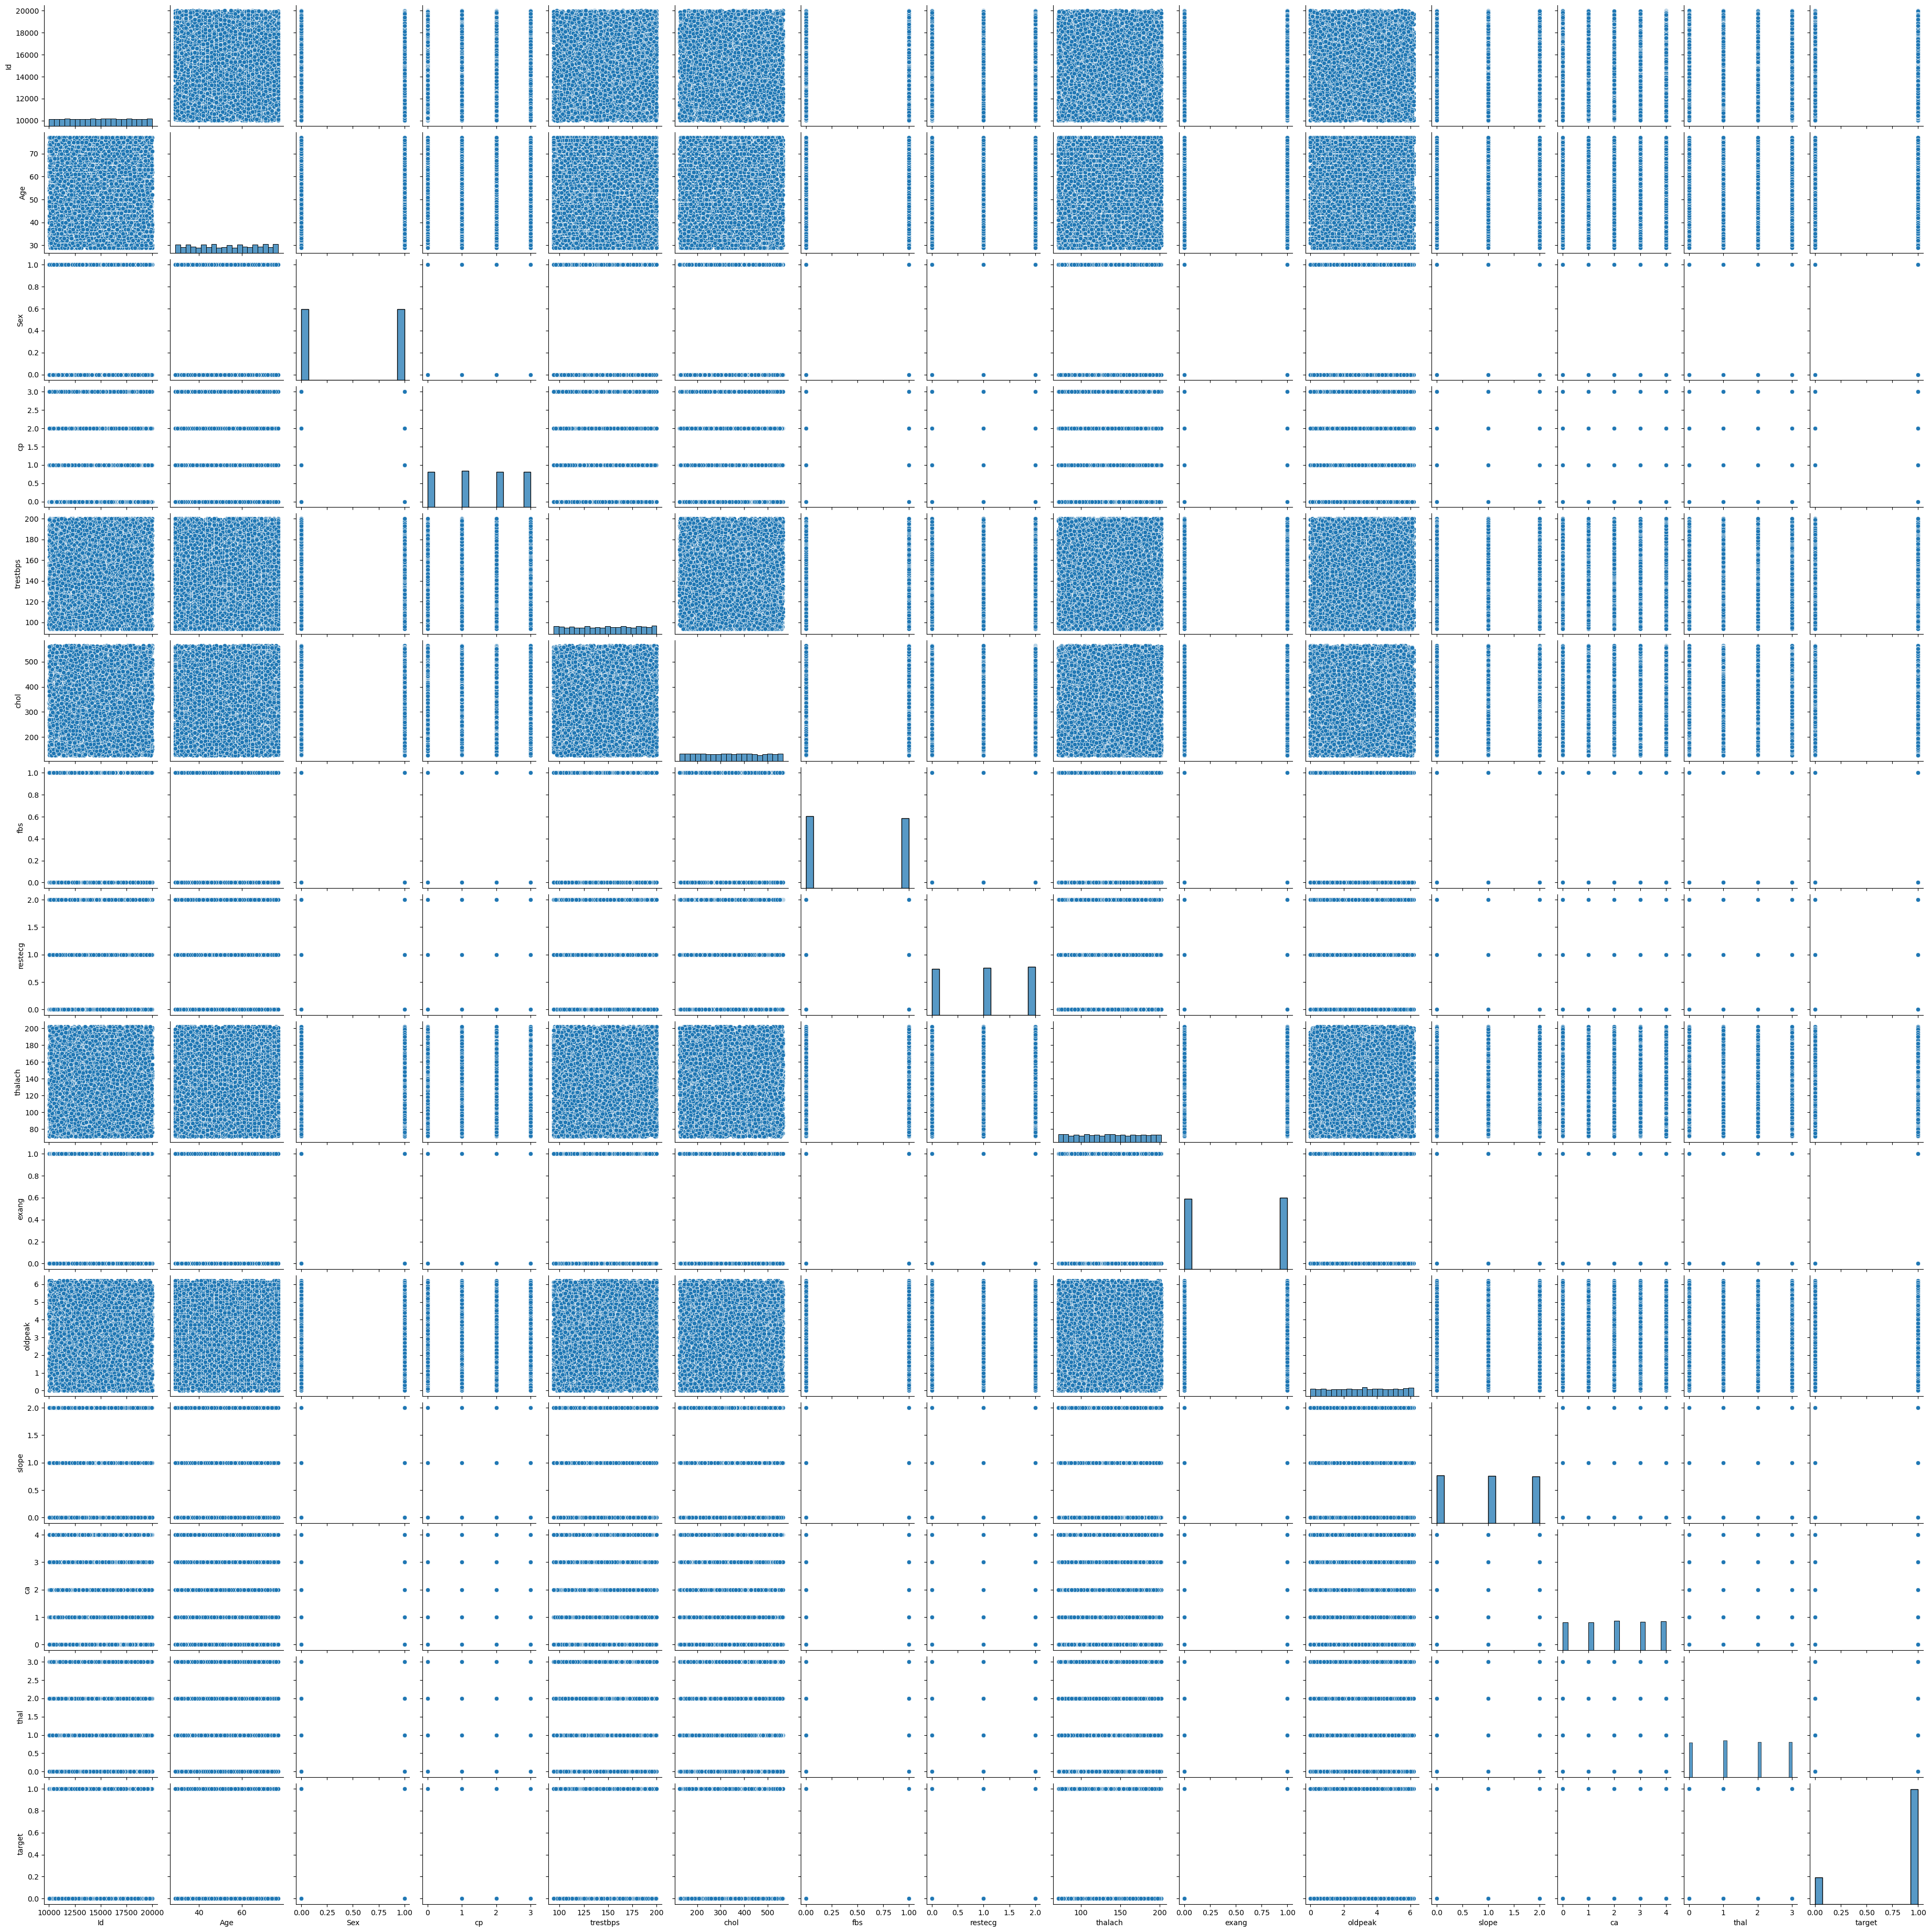

In [37]:
sns.pairplot(train)

In [40]:
train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
train['target'].value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

In [42]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [43]:
X = train.drop(columns=["target", "Id"], axis=1)
X.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0


In [45]:
y = train["target"]
print(y.value_counts())

target
1    5941
0    1362
Name: count, dtype: int64


In [71]:
X.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [69]:
test.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [72]:
test_data = test.drop(columns=["id"])

In [73]:
# Rename the columns in the DataFrame
test_data.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [75]:
X.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [74]:
test_data.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [47]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Shape of the X_train and X_test
X_train.shape, X_test.shape, y.shape

((5842, 13), (1461, 13))

In [49]:
# resampling the data using SMOTE because the target variable is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

 #Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
target
1    5941
0    1362
Name: count, dtype: int64

Class distribution after SMOTE:
target
1    4740
0    4740
Name: count, dtype: int64


In [76]:
# 5.2 Model Training with XGBoost
model = CatBoostClassifier(
    iterations = 10000,
    eta = 0.1,
    depth = 6,
    random_seed = 42,
    verbose = 100 )
model.fit(X_resampled, y_resampled)

0:	learn: 0.5644368	total: 4.07ms	remaining: 40.7s
100:	learn: 0.1994899	total: 353ms	remaining: 34.6s
200:	learn: 0.1558509	total: 701ms	remaining: 34.2s
300:	learn: 0.1244879	total: 1.05s	remaining: 33.8s
400:	learn: 0.0990284	total: 1.39s	remaining: 33.4s
500:	learn: 0.0819330	total: 1.74s	remaining: 33.1s
600:	learn: 0.0681879	total: 2.09s	remaining: 32.7s
700:	learn: 0.0570411	total: 2.44s	remaining: 32.3s
800:	learn: 0.0484692	total: 2.78s	remaining: 32s
900:	learn: 0.0410808	total: 3.13s	remaining: 31.6s
1000:	learn: 0.0356101	total: 3.47s	remaining: 31.2s
1100:	learn: 0.0307650	total: 3.82s	remaining: 30.9s
1200:	learn: 0.0261087	total: 4.17s	remaining: 30.5s
1300:	learn: 0.0225495	total: 4.51s	remaining: 30.2s
1400:	learn: 0.0198215	total: 4.86s	remaining: 29.8s
1500:	learn: 0.0174795	total: 5.2s	remaining: 29.4s
1600:	learn: 0.0156357	total: 5.54s	remaining: 29.1s
1700:	learn: 0.0140146	total: 5.88s	remaining: 28.7s
1800:	learn: 0.0125631	total: 6.22s	remaining: 28.3s
1900:	l

In [65]:
# 5.2 Model Training with XGBoost
model = xgb.XGBClassifier()
model.fit(X_resampled, y_resampled)        

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.48      0.59      0.53       260
           1       0.91      0.86      0.88      1201

    accuracy                           0.81      1461
   macro avg       0.69      0.73      0.70      1461
weighted avg       0.83      0.81      0.82      1461



In [78]:
# Evaluate on train and test data
acc_train = model.score(X_resampled, y_resampled)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.811088295687885


In [79]:
test_pred = model.predict(test_data)  #making predictions on the test data

In [80]:
sub.head() #checking the first five rows of the submission dataframe

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [81]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': test_pred
})

# Save the submission DataFrame to a CSV file
submission.to_csv('sub_ctb1.csv', index=False)

### Catboost Classifier